# Ninjas Analisis

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./ninjas_data.csv')

## Crear columna "Expertise"
### Siendo esta la suma de la edad, peso máximo y vida de un ninja

In [39]:
df['expertise'] = df['maxWeight'] + df['life'] + df['age']
print(df)

             id          name  maxWeight  life  age  expertise
0             1       Ninja_0         87    88   26        201
1             2       Ninja_1        146   138   49        333
2             3       Ninja_2         66    82   19        167
3             4       Ninja_3         56    58   18        132
4             5       Ninja_4         67    52   18        137
...         ...           ...        ...   ...  ...        ...
999995   999996  Ninja_999995         87    61   24        172
999996   999997  Ninja_999996        140   145   37        322
999997   999998  Ninja_999997        128   126   49        303
999998   999999  Ninja_999998        100    73   22        195
999999  1000000  Ninja_999999         65    53   24        142

[1000000 rows x 6 columns]


### Estadísticas descriptivas

In [47]:
print(df[['maxWeight', 'life', 'age', 'expertise']].describe())

            maxWeight            life             age       expertise
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
mean        96.012288       95.991921       28.249006      220.253215
std         27.171510       27.173670        8.613914       58.274930
min         50.000000       50.000000       18.000000      118.000000
25%         75.000000       75.000000       21.000000      172.000000
50%         93.000000       93.000000       25.000000      208.000000
75%        121.000000      121.000000       34.000000      262.000000
max        150.000000      150.000000       50.000000      350.000000


### Visualización de Distribución

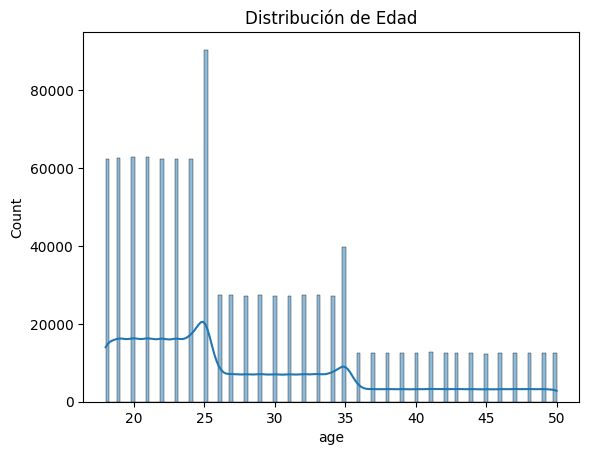

In [48]:
sns.histplot(df['age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

### Matriz de Correlación

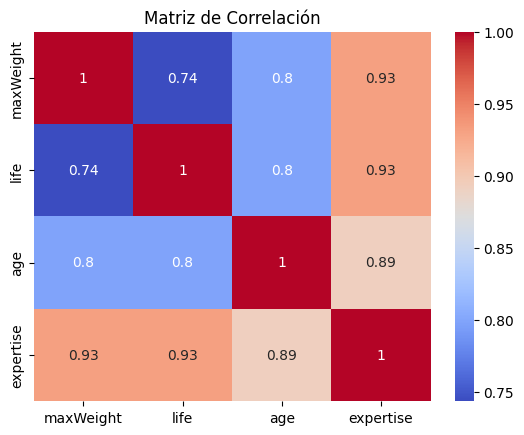

In [49]:
correlation_matrix = df[['maxWeight', 'life', 'age', 'expertise']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

### Agrupación de datos

In [58]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

age_group_summary = df.groupby('age_group', observed=False)[['maxWeight', 'life']].mean()
print(age_group_summary)

            maxWeight        life
age_group                        
0-20        75.056694   75.000021
21-40       94.627136   94.622351
41-60      135.023375  134.971822
61-80             NaN         NaN
81-100            NaN         NaN


### Manejo de valores nulos

In [59]:
print(df.isnull().sum())

id           0
name         0
maxWeight    0
life         0
age          0
expertise    0
age_group    0
dtype: int64
